# NetCDF using Xarray

Following a similar pattern as found at [TowardDataScience](https://towardsdatascience.com/handling-netcdf-files-using-xarray-for-absolute-beginners-111a8ab4463f)

In [1]:
import xarray as xr

## Define our input file

In [2]:
netcdf_file = r'D:\DATA\USFS\DAYMET\TEMP\daymet_v3_tmin_monavg_2017_na.nc4'

## Open the file

If we wanted to open multiple files, we can do that with a wildcard "*", but we need to also have ```dask``` insatlled.

In [3]:

# single file
#dataDIR = '../data/ARM/twparmbeatmC1.c1.20050101.000000.cdf'
DS = xr.open_dataset(netcdf_file)

# OR multiple files - this require DASK
#mfdataDIR = '../data/ARM/twparmbeatmC1.c1.*.000000.cdf'
#DS = xr.open_mfdataset(mfdataDIR)

## Looking at the temperature data

We can isolate the temperature array as follows.

In [4]:
DS['tmin']

<xarray.DataArray 'tmin' (time: 12, y: 8075, x: 7814)>
[757176600 values with dtype=float32]
Coordinates:
    lat      (y, x) float32 ...
    lon      (y, x) float32 ...
  * time     (time) datetime64[ns] 2017-01-16T12:00:00 ... 2017-12-17
  * x        (x) float32 -4.56e+06 -4.559e+06 -4.558e+06 ... 3.252e+06 3.253e+06
  * y        (y) float32 4.984e+06 4.983e+06 4.982e+06 ... -3.089e+06 -3.09e+06
Attributes:
    grid_mapping:  lambert_conformal_conic
    units:         degrees C
    cell_methods:  area: mean time: minimum within days time: mean over days
    long_name:     monthly average of daily minimum temperature

## Temperature as numpy array

we can cnvert the dataset to a numpy array by calling the [```values```](http://xarray.pydata.org/en/stable/howdoi.html).

In [5]:
DS['tmin'].values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

## Other properties of the dataset

In [6]:
DS.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:                  (time: 12, nv: 2, y: 8075, x: 7814)
Coordinates:
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
  * time                     (time) datetime64[ns] 2017-01-16T12:00:00 ... 20...
  * x                        (x) float32 -4.56e+06 -4.559e+06 ... 3.253e+06
  * y                        (y) float32 4.984e+06 4.983e+06 ... -3.09e+06
Dimensions without coordinates: nv
Data variables:
    time_bnds                (time, nv) datetime64[ns] ...
    lambert_conformal_conic  int16 ...
    tmin                     (time, y, x) float32 nan nan nan ... nan nan nan
Attributes:
    start_year:                2017
    source:                    Daymet Software Version 3.0
    Version_software:          Daymet Software Version 3.0
    Version_data:              Daymet Data Version 3.0
    Conventions:               CF-1.6
    citation:

In [7]:
DS.dims

Frozen({'time': 12, 'nv': 2, 'y': 8075, 'x': 7814})

In [8]:
DS.coords

Coordinates:
    lat      (y, x) float32 ...
    lon      (y, x) float32 ...
  * time     (time) datetime64[ns] 2017-01-16T12:00:00 ... 2017-12-17
  * x        (x) float32 -4.56e+06 -4.559e+06 -4.558e+06 ... 3.252e+06 3.253e+06
  * y        (y) float32 4.984e+06 4.983e+06 4.982e+06 ... -3.089e+06 -3.09e+06

In [9]:
DS.attrs

{'start_year': 2017,
 'source': 'Daymet Software Version 3.0',
 'Version_software': 'Daymet Software Version 3.0',
 'Version_data': 'Daymet Data Version 3.0',
 'Conventions': 'CF-1.6',
 'citation': 'Please see http://daymet.ornl.gov/ for current Daymet data citation information',
 'references': 'Please see http://daymet.ornl.gov/ for current information on Daymet references',
 'nco_openmp_thread_number': 1,
 'NCO': '"4.6.0"'}

## We can slice through the data

In [10]:
da = DS.sel(time=slice('2017-01-01', '2017-12-31'))
da

<xarray.Dataset>
Dimensions:                  (time: 12, nv: 2, y: 8075, x: 7814)
Coordinates:
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
  * time                     (time) datetime64[ns] 2017-01-16T12:00:00 ... 20...
  * x                        (x) float32 -4.56e+06 -4.559e+06 ... 3.253e+06
  * y                        (y) float32 4.984e+06 4.983e+06 ... -3.09e+06
Dimensions without coordinates: nv
Data variables:
    time_bnds                (time, nv) datetime64[ns] ...
    lambert_conformal_conic  int16 ...
    tmin                     (time, y, x) float32 nan nan nan ... nan nan nan
Attributes:
    start_year:                2017
    source:                    Daymet Software Version 3.0
    Version_software:          Daymet Software Version 3.0
    Version_data:              Daymet Data Version 3.0
    Conventions:               CF-1.6
    citation:                  Please see http://daymet.ornl.gov/ for current...
    references:                Please see http://daymet.ornl.gov/ for current...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"

In [11]:
da = DS.sel(time=slice('2017-12-01', '2017-12-31'))
da

<xarray.Dataset>
Dimensions:                  (time: 1, nv: 2, y: 8075, x: 7814)
Coordinates:
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
  * time                     (time) datetime64[ns] 2017-12-17
  * x                        (x) float32 -4.56e+06 -4.559e+06 ... 3.253e+06
  * y                        (y) float32 4.984e+06 4.983e+06 ... -3.09e+06
Dimensions without coordinates: nv
Data variables:
    time_bnds                (time, nv) datetime64[ns] ...
    lambert_conformal_conic  int16 -24832
    tmin                     (time, y, x) float32 nan nan nan ... nan nan nan
Attributes:
    start_year:                2017
    source:                    Daymet Software Version 3.0
    Version_software:          Daymet Software Version 3.0
    Version_data:              Daymet Data Version 3.0
    Conventions:               CF-1.6
    citation:                  Please see http://daymet.ornl.gov/ for current...
    references:                Please see http://daymet.ornl.gov/ for current...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"

In [12]:
da['tmin']

<xarray.DataArray 'tmin' (time: 1, y: 8075, x: 7814)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
    lat      (y, x) float32 ...
    lon      (y, x) float32 ...
  * time     (time) datetime64[ns] 2017-12-17
  * x        (x) float32 -4.56e+06 -4.559e+06 -4.558e+06 ... 3.252e+06 3.253e+06
  * y        (y) float32 4.984e+06 4.983e+06 4.982e+06 ... -3.089e+06 -3.09e+06
Attributes:
    grid_mapping:  lambert_conformal_conic
    units:         degrees C
    cell_methods:  area: mean time: minimum within days time: mean over days
    long_name:     monthly average of daily minimum temperature

In [13]:
array = da['tmin'].values
array.shape

(1, 8075, 7814)

## Plotting a slice

In [14]:
import matplotlib.pyplot as plt

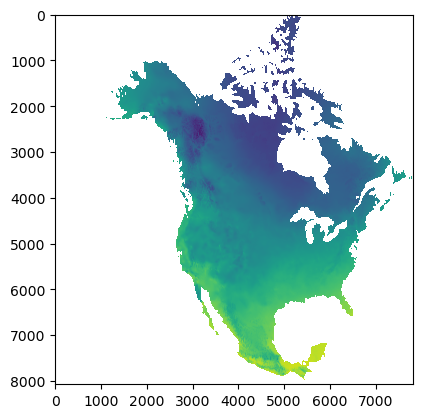

In [15]:
plt.imshow(array[0,:,:])
plt.show()